<a href="https://colab.research.google.com/github/Arghaweeb/Self-Drving-Car/blob/main/Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
import tensorflow

In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
n_pts = 500
centers = [[-1,1], [-1,-1], [1,-1]]
X, y = datasets.make_blobs(n_samples = n_pts, random_state = 123, centers = centers, cluster_std = 0.4)


In [ ]:
centers = [[-1,1], [-1,-1], [1,-1]]

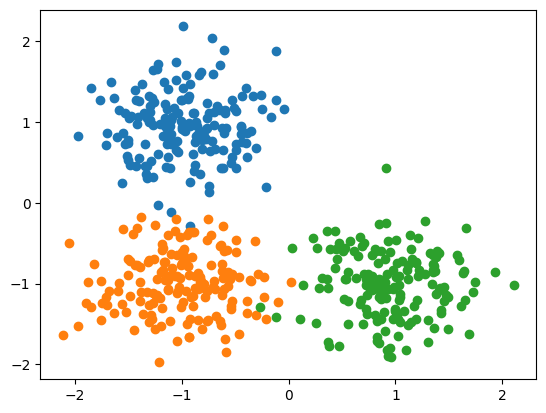

In [ ]:
plt.scatter(X[y==0, 0],X[y==0, 1])
plt.scatter(X[y==1, 0],X[y==1, 1])
plt.scatter(X[y==2, 0],X[y==2, 1])

In [ ]:
y_cat = to_categorical(y, 3)
print(y_cat)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [ ]:
model = Sequential()
model.add(Dense(units=3, input_shape=(2,), activation = 'softmax'))
model.compile(Adam(learning_rate = 0.1), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=X, y=y_cat, verbose=1, batch_size = 50, epochs= 100)

Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 0.8663 - accuracy: 0.5800
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2509 - accuracy: 0.9900
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.1243 - accuracy: 0.9880
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0889 - accuracy: 0.9880
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0743 - accuracy: 0.9880
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0664 - accuracy: 0.9880
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0616 - accuracy: 0.9880
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0578 - accuracy: 0.9880
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0549 - accuracy: 0.9880
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9880
Epoch 11/

In [ ]:
def plt_decision_boundary(X, y_cat, model):
  x_span = np.linspace(min(X[:,0]) - 1, max(X[:, 0]) + 1)
  y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_, yy_]
  pred_prob = model.predict(grid)
  pred_classes = np.argmax(pred_prob, axis=-1)
  z = pred_classes.reshape(xx.shape)
  plt.contourf(xx, yy, z)

79/79 [==============================] - 0s 1ms/step


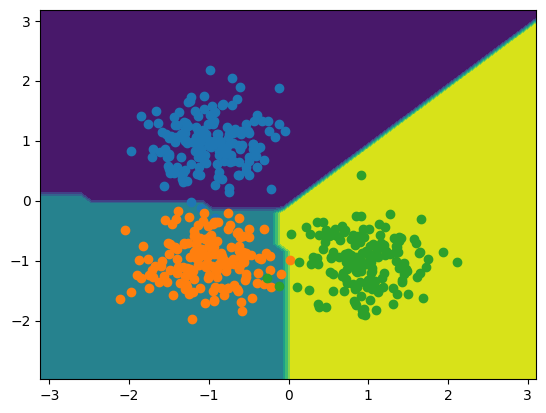

In [ ]:
plt_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0],X[y==0, 1])
plt.scatter(X[y==1, 0],X[y==1, 1])
plt.scatter(X[y==2, 0],X[y==2, 1])

1/1 [==============================] - 0s 20ms/step
Prediction is [0]


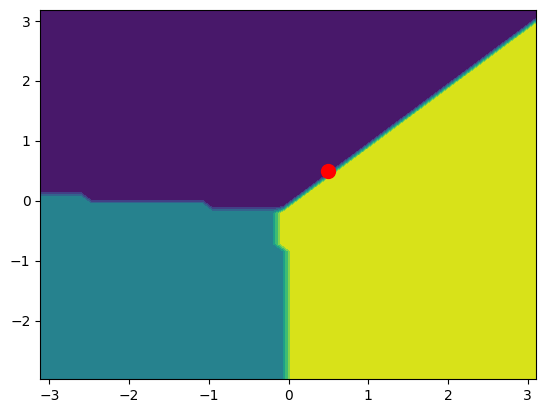

In [ ]:
plt_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0],X[y==0, 1])
plt.scatter(X[y==1, 0],X[y==1, 1])
plt.scatter(X[y==2, 0],X[y==2, 1])
x = 0.5
y= 0.5
point = np.array([[x, y]])
pred_prob = model.predict(point)
pred_classes = np.argmax(pred_prob, axis=-1)
plt.plot([x], [y], marker='o', markersize=10, color="r")
print("Prediction is", pred_classes)